# Running Elegant with XOPT + Archiving

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
import sys
lume_path = ''
sys.path.append(lume_path + 'openPMD-beamphysics')
sys.path.append(lume_path + 'distgen')
sys.path.append(lume_path + 'xopt')

In [2]:
# Import the class
from xopt import Xopt

### Make YAML and Run with Random Inputs

In [3]:
# Make a proper input file. 
YAML="""
xopt: {output_path: output , verbose: true, algorithm: cnsga}

algorithm:
  name: cnsga
  options: {max_generations: 3, population_size: 4, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant  
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
#    L2_10_50_phase: [30, 70]
    L2_10_25_phase: [30, 60]
#    X_MAX: [0.5e-3, 3.0e-3]
#    DX: [0.9e-3, 1.1e-3]
#    DP: [10.0e-5, 18.0e-5]
  objectives:
    sigma_pz: MINIMIZE
    norm_emit_x: MINIMIZE
#    sigma_t: MINIMIZE
#    ptp_t: MINIMIZE
#    core_pz: MINIMIZE
#    core_current: MAXIMIZE
  constraints:
 #   sigma_pz: [LESS_THAN, 4.0e+6]
    norm_emit_x: [LESS_THAN, 0.6e-6]
    ptp_t: [LESS_THAN, 6.0e-14]
  #  sigma_t: [LESS_THAN, 3.0e-15]
  #  mean_pz: [GREATER_THAN, 6.0e+9]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_25_phase}
  constants: 
#    L1_9_25_phase: 65.108
#    L2_10_25_phase: 57.0
    L3_10_25_volt: 1.6628471874e+7
    L3_10_50_volt: 1.6628471874e+7
    X_MAX: 5.0e-3
    DX: 1.1e-3
    DP: 16.0e-5
    INPUT_FILE: /global/u2/a/aedelen/GitHub/elegant_particles.txt
    sample_interval: 1000
    

"""



In [4]:
X = Xopt(YAML)

Loading config as text


In [5]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/u2/a/aedelen/elegant_example/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 4, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10

In [6]:
!pwd

/global/u2/a/aedelen/elegant_example


In [7]:
X.random_evaluate()

/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant LCLS2cuH.ele -macro=L1_9_50_phase=37.22483484310699  -macro=L1_9_25_phase=51.78869033788133  -macro=L1_10_25_phase=40.58125872791557  -macro=X1_Xband_phase=-72.26457724919416  -macro=L2_10_25_phase=33.461342037733225  -macro=L3_10_25_volt=16628471.874  -macro=L3_10_50_volt=16628471.874  -macro=X_MAX=0.005  -macro=DX=0.0011  -macro=DP=0.00016  -macro=INPUT_FILE=/global/u2/a/aedelen/GitHub/elegant_particles.txt  -macro=sample_interval=1000  -macro=L2_10_50_phase=33.461342037733225 


{'sigma_pz': 16289942.38515568,
 'norm_emit_x': 1.1698421667953824e-06,
 'sigma_t': 1.5679384099751278e-14,
 'mean_pz': 5969615380.122687,
 'charge': 1.4145000000000001e-10,
 'ptp_t': 1.1097434599814096e-13,
 'core_norm_emit_x': 7.988404167239584e-07,
 'core_pz': 10323883.547483943,
 'core_current': 4027.7641699016795,
 'archive': './output/beams/elegant_sim_a473eb3b1a54a99aea101132967cbea7.h5'}

## Run GA

In [8]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [9]:
# Change max generations
X.algorithm['options']['max_generations'] = 2
X.run(executor=executor)

Starting at time 2020-11-02T15:34:22-08:00



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.1

Creating toolbox from vocs.
Created toolbox with 5 variables, 3 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'DP': 0.00016,
               'DX': 0.0011,
               'INPUT_FILE': '/global/u2/a/aedelen/GitHub/elegant_particles.txt',
               'L3_10_25_volt': 16628471.874,
               'L3_10_50_volt': 16628471.874,
               'X_MAX': 0.005,
    

In [11]:
#settings = {'L1_10_25_phase': 48.10988000636041,
#'L1_9_25_phase': 7.722087823054991,
#'L1_9_50_phase': -34.63546794399416,
#'L2_10_50_phase': -49.99535063902283,
#'X1_Xband_phase': 97.87343465656124,
#'L2_10_25_phase': 55.5}

In [12]:
#X.evaluate(settings)

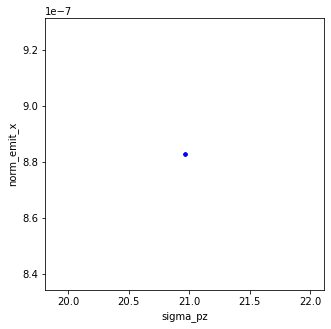

In [13]:
# Extract objectives from output
import numpy as np
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.population['outputs']]
y = [o[key2] for o in X.population['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(x, y, color='blue')
ax.plot(np.asarray(x)/1.0e6, np.asarray(y),'.', color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

## Load Data from Json

In [14]:
from xopt.dataset import load_all_xopt_data

In [15]:
from glob import glob
jlist = glob('output/gen*json')
jlist

['output/gen_2.json', 'output/gen_1.json']

In [16]:
DAT = load_all_xopt_data(jlist)


In [17]:
DAT

,L1_10_25_phase,L1_9_25_phase,L1_9_50_phase,L2_10_25_phase,X1_Xband_phase,L3_10_25_volt,L3_10_50_volt,X_MAX,DX,DP,...,sigma_pz,norm_emit_x,sigma_t,mean_pz,charge,ptp_t,core_norm_emit_x,core_pz,core_current,archive
0,61.074294,62.062394,35.356375,51.499169,-76.098940,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_23a0f510d766168501f...
1,37.889814,57.195531,51.047675,51.765642,-59.070867,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_96b29fbaf62aefa81a1...
2,36.548020,65.777861,54.221227,55.248344,-59.475023,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_e0bf298db3a95661af4...
3,34.753855,54.191747,63.651679,54.961527,-73.400363,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_0e60c9abc5cd34db8df...
4,54.070006,69.170769,35.631350,50.896812,-74.343868,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_213420102a1014edab3...
5,37.889814,57.195531,53.695003,38.582577,-59.548681,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_1388d755f20ecb0d7a7...
6,61.751410,64.034597,52.913835,51.474425,-99.523917,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_d7f97455ca9efbd1ebb...
7,61.743432,68.279162,53.924006,50.872068,-97.768846,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_977b34626611c9824b3...
8,64.991649,54.191747,63.651679,38.582577,-73.340796,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.096161e+07,8.827660e-07,2.066807e-14,5.964759e+09,1.134000e-10,8.524220e-14,5.098938e-07,7.469646e+06,1972.667218,./output/beams/elegant_sim_6550608582ec24844b3...


In [18]:
#see archive file list --> particle distributions

In [19]:
DAT['archive']

0    ./output/beams/elegant_sim_23a0f510d766168501f...
1    ./output/beams/elegant_sim_96b29fbaf62aefa81a1...
2    ./output/beams/elegant_sim_e0bf298db3a95661af4...
3    ./output/beams/elegant_sim_0e60c9abc5cd34db8df...
4    ./output/beams/elegant_sim_213420102a1014edab3...
5    ./output/beams/elegant_sim_1388d755f20ecb0d7a7...
6    ./output/beams/elegant_sim_d7f97455ca9efbd1ebb...
7    ./output/beams/elegant_sim_977b34626611c9824b3...
8    ./output/beams/elegant_sim_6550608582ec24844b3...
Name: archive, dtype: object

In [20]:
DAT['archive'][0]

'./output/beams/elegant_sim_23a0f510d766168501f1b889e8c24f6c.h5'

## Load Particle Distribution

In [25]:
from pmd_beamphysics import ParticleGroup
from h5py import File
import h5py

In [26]:
with h5py.File(DAT['archive'][0], 'r') as h5:
    print(list(h5.attrs))

['basePath', 'chargeUnitSI', 'dataType', 'numParticles', 'openPMD', 'openPMDextension', 'particlesPath', 'speciesType', 'totalCharge']


In [27]:
# This will convert to a data dict
P = ParticleGroup(DAT['archive'][0])
P

<ParticleGroup with 756 particles at 0x2aaad6130460>

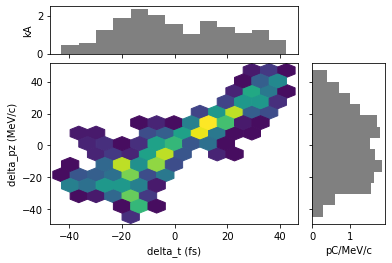

In [28]:

P.plot('delta_t', 'delta_pz')